In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
addpath = "../data/"
df = pd.read_csv(addpath + "train.csv")
df_test = pd.read_csv(addpath + "test.csv")

data = pd.concat([df, df_test], sort=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
display(data.isnull().sum())
print(data.shape)

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

(1309, 12)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
age = pd.concat([df["Age"], df_test["Age"]])
fare = pd.concat([df["Fare"], df_test["Fare"]])

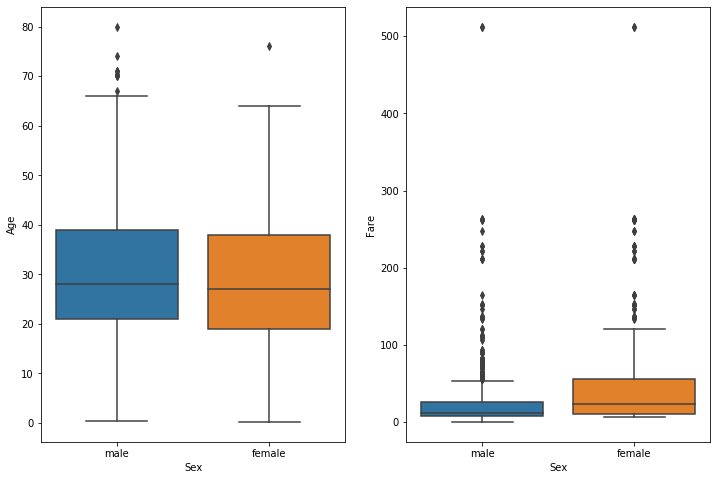

In [28]:
fig,ax = plt.subplots(1,2, figsize=(12,8))
dummy = sns.catplot(x="Sex", y="Age", data=data, kind="box", ax=ax[0])
plt.close(dummy.fig)
dummy = sns.catplot(x="Sex", y="Fare", data=data, kind="box", ax=ax[1])
plt.close(dummy.fig)

In [ ]:
plt.plot([df["Age"], df_test["Age"]])

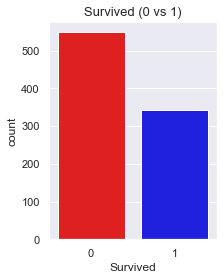

In [31]:
plt.figure(figsize=(3, 4))
sns.set(style="darkgrid")
sns.countplot(x="Survived", data=df, palette=["Red", "Blue"])
plt.title("Survived (0 vs 1)", size=13)
plt.show()

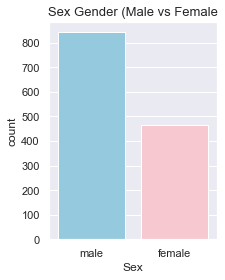

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize=(3,4))
sns.countplot(x="Sex", data=data, palette=["skyblue", "pink"])
plt.title("Sex Gender (Male vs Female", size=13)
plt.show()

Text(0.5, 1.0, 'Relation: Sex and Survived')

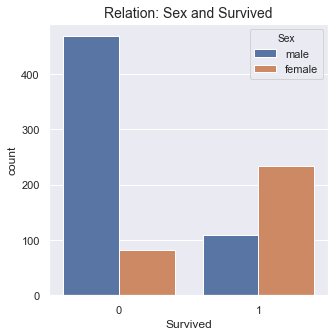

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Relation: Sex and Survived", size=14)

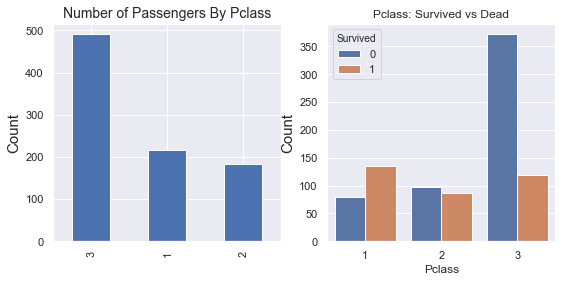

In [45]:
fig, ax = plt.subplots(1,2, figsize=(9,4))

df["Pclass"].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Number of Passengers By Pclass", size=14)
ax[0].set_ylabel("Count", size=15)

sns.countplot("Pclass", hue="Survived", data=df, ax=ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
ax[1].set_ylabel("Count", size=15)

plt.show()

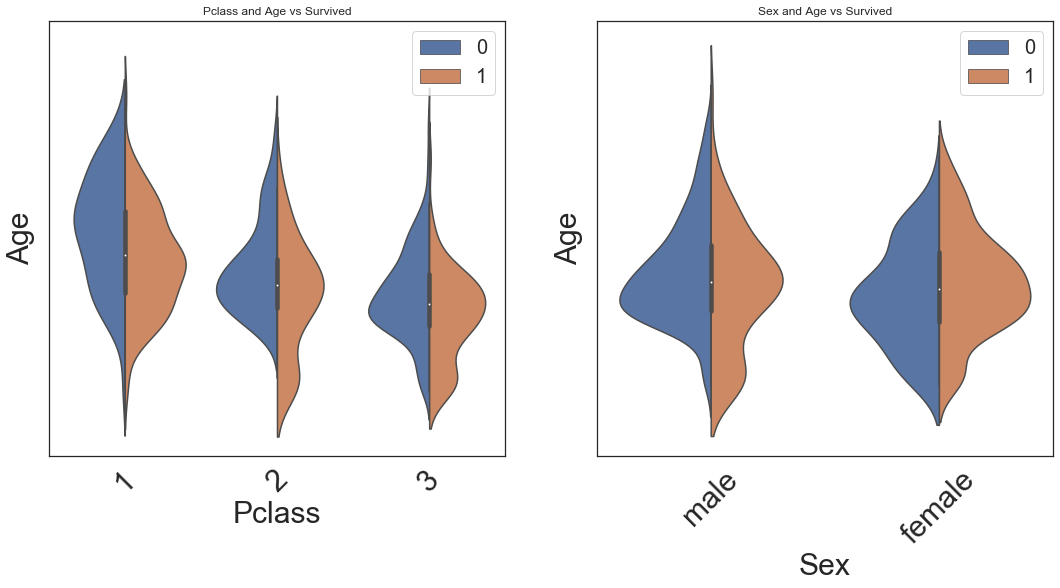

In [61]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.set_style("white")

xticklabels0 = ax[0].get_xticklabels()
xticklabels1 = ax[1].get_xticklabels()
yticklabels0 = ax[0].get_yticklabels()
yticklabels1 = ax[1].get_yticklabels()

sns.violinplot("Pclass", "Age", hue="Survived", data=df, split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0, 110, 10))
ax[0].set_xlabel("Pclass", fontsize=30)
ax[0].set_ylabel("Age", fontsize=30)
ax[0].set_xticklabels(xticklabels0,fontsize=30, rotation=45)
ax[0].set_yticklabels(yticklabels0,fontsize=30)
ax[0].legend(fontsize=20)

sns.violinplot("Sex", "Age", hue="Survived", data=df, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))
ax[1].set_xlabel("Sex", fontsize=30)
ax[1].set_ylabel("Age", fontsize=30)
ax[1].set_xticklabels(xticklabels1,fontsize=30, rotation=45)
ax[1].set_yticklabels(yticklabels1,fontsize=30)
ax[1].legend(fontsize=20)
plt.show()

Text(0.5, 1.0, 'Relation : Embarked and Survived')

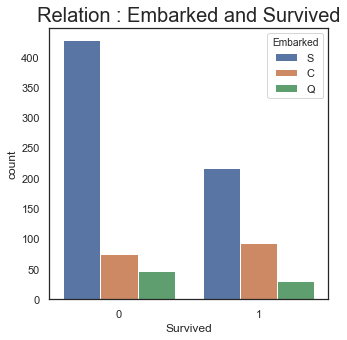

In [63]:
#Lets visualize the relation Embarked and number of survivors
plt.figure(figsize=(5,5))
sns.countplot(x = 'Survived', hue = 'Embarked', data = df)
plt.title("Relation : Embarked and Survived",size=20)